In [1]:
import numpy as np
import pylab as plt
import networkx as nx

In [2]:
#Initializing points
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

C:\Users\pawan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


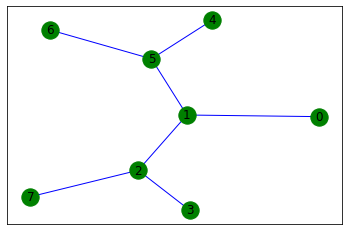

In [3]:
goal = 7
mapping={0:'Start', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7-Destination'}
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G,k=.5,center=points_list[2])
nx.draw_networkx_nodes(G,pos,node_color='g')
nx.draw_networkx_edges(G,pos,edge_color='b')
nx.draw_networkx_labels(G,pos)
plt.show()

In [10]:
NO_OF_POINTS = 8
 
#Inititlaizing R Matrix
R = np.matrix(np.ones(shape=(NO_OF_POINTS, NO_OF_POINTS)))
R *= -1
 
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 150
    else:
        R[point] = 0
    if point[0] == goal:
        R[point[::-1]] = 150
    else:
    # reverse of point
        R[point[::-1]]= 0

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [11]:
R[goal,goal]= 150
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 150.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 150.]])

In [18]:
Q = np.matrix(np.zeros([NO_OF_POINTS,NO_OF_POINTS]))
 
# The learning parameter
gamma = 0.8
 
initial_state = 1
 
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row &amp;amp;gt;= 0)[1]
return av_act
    available_act = available_actions(initial_state)
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
return next_action
 
action = sample_next_action(available_act)
 
def update(current_state, action, gamma):
     max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
if max_index.shape[0] &amp;amp;gt; 1:
    max_index = int(np.random.choice(max_index, size = 1))
else:
    max_index = int(max_index)
    max_value = Q[action, max_index]
Q[current_state, action] = R[current_state, action] + gamma * max_value
print('max_value', R[current_state, action] + gamma * max_value)
 
if (np.max(Q) &amp;amp;gt; 0):
return(np.sum(Q/np.max(Q)*100))
else:
return (0)
 
update(initial_state, action, gamma)

SyntaxError: invalid syntax (<ipython-input-18-114b5d06e5cf>, line 10)

In [17]:
scores = []
for i in range(700):
current_state = np.random.randint(0, int(Q.shape[0]))
available_act = available_actions(current_state)
action = sample_next_action(available_act)
score = update(current_state,action,gamma)
scores.append(score)
print ('Score:', str(score))
 
print("Trained Q matrix:")
print(Q/np.max(Q)*100)
 
# Testing
current_state = 0
steps = [current_state]
 
while current_state != 7:
 
next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
 
if next_step_index.shape[0] &amp;amp;gt; 1:
next_step_index = int(np.random.choice(next_step_index, size = 1))
else:
next_step_index = int(next_step_index)
 
steps.append(next_step_index)
current_state = next_step_index

IndentationError: expected an indented block (<ipython-input-17-40951b757a19>, line 3)

In [16]:
print("Most efficient path:")
print(steps)
 
plt.plot(scores)
plt.show()

Most efficient path:


NameError: name 'steps' is not defined